# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 3</p>
## <p style="text-align: center;">Total points: 85</p>
## <p style="text-align: center;">Due: Monday, **Oct 18th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Soumi Basu

EID: sb59982

Name: Ankita Kundra

EID: ak44675

# Question 1: Stochastic gradient descent II (20 pts)

Write an SGD solution in Python to the non-linear model without using any other library except for those provided in the code template below. 

$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2 + w_4x_1x_2^2 + w_5x_2^3$$ 

The solution class template is given. The `init()` function of the class takes as input the `learning_rate`, `regularization_constant` and `number_of_epochs`. The `fit()` method must take as input `X`, `y` and `update_rule` which can be `'sgd_momentum'` or `'RMSprop'`. The `predict()` method takes an `X` value (optionally, an array of values). 

Use your new gradient descent regression to train your model and predict the data given in 'SGD_samples.csv', for 30 epochs, using learning rates: `[0.0001, 0.001, 0.01, 0.05]` and regularization (ridge regression) constants: `[0, 0.01, 0.1]`. **(8 points)** 

Plot MSE and the $w$ parameters as a function of epoch (for 30 epochs) for the best 2 combinations of `learning_rate` and `regularization_constant` for SGD-Momentum, RMSprop, i.e., for each combination, you should have one plot for MSE vs Epoch and another for the parameters(weights) vs Epoch using respectively SGD-Momentum and RMSprop, hence in total 8 plots. Report the `learning_rate`, `regularization_constant` and MSE at the end of 30 epochs for the two best combinations for SGD-Momentum and RMSprop respectively. **($4\times 2 = 8$ pts)**

Observe the results, compare the performance of the two learning methods **(4 pts)**. 

Here is a blog which you can go through to know about RMSprop and Adam - [blog](http://ruder.io/optimizing-gradient-descent/).

Following codes are for your reference, please don't change the initialization values of the given parameters.


In [ ]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

num_of_coefs = 6

class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.eps = 10**-8
        self.coef = np.zeros(num_of_coefs) # coefficient vector
        self.cache = np.zeros(self.coef.shape) # used only for rmsprop
        self.gama = 0.9 # used only for rmsprop
        self.mu = 0.9 # used in momentum

    def rmsprop(self, gradient):
        '''
        updates self.coef based on gradient using rmsprop
        '''
        self.cache = self.gama*self.cache + (1-self.gama)*(gradient**2)
        self.coef = self.coef - (self.learning_rate * gradient / (np.sqrt(self.cache) + self.eps))
        
    
    def sgd_momentum(self, gradient):
        '''
        updates self.coef based on gradient using Sgd_momentum
        '''
        self.momentum = self.mu*self.momentum + self.learning_rate*gradient
        self.coef = self.coef - self.momentum
    
    
    def fit(self, X, y, update_rule='sgd_momentum', plot=False):
        '''
        Fit the model given X, y. It uses the specified update_rule
        and displays a plot of the coefficients vs epochs, and mse vs epochs if plot is set as True. 
        
        -> use get_features to get the features from X
        -> for epoch in epochs:
            iterate through all x, y.
                compute prediction using linearPredict.
                compute gradient.
                pass this gradient to the corresponding update function and update the coefficients
                keep track of mse and coefficients
        -> plot if required
        
        '''
        
        mse = []
        coefs = []
        X = self.get_features(X)
        self.momentum = 0
        
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
#                 error = X[i,:]@self.coef - y[i]
                error = self.linearPredict(X[i,:]) - y[i]
    
                coef_reg = self.coef.copy()
                coef_reg[0] = 0 #intercept weight do not participate in regularization
            
                # Compute gradients
                gradient  = error * X[i,:] + self.regularization*coef_reg
               
                # Update weights
                if update_rule == 'sgd_momentum':
                    self.sgd_momentum(gradient)
                elif update_rule == 'RMSprop':
                    self.rmsprop(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)    
            mse.append(np.mean(residuals**2))
            
        self.lowest_mse = mse[-1]
        if plot == True:
            # Coeffiecients vs Epoch
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.plot(range(self.n_epoch),coefs[:,4],label='w4')
            plt.plot(range(self.n_epoch),coefs[:,5],label='w5')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')
            
            # MSE vs Epoch
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')

    def get_features(self, X):
        x = np.zeros((X.shape[0], 6))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = (X[:,0]**2)*X[:,1]
        x[:,4] = X[:,0] * (X[:,1]**2)
        x[:,5] = X[:,1]**3
        
        return x
        
    def linearPredict(self, X_features):
        '''
        returns the dot product of X and self.coef
        '''
        return np.dot(X_features, self.coef)

In [ ]:
# # Only use this code block if you are using Google Colab.
# # If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

# ## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
# ## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 30
learning_rate = [0.0001, 0.001, 0.01, 0.05]
regularization = [0, 0.01, 0.1]

# Answer:

## SGD with Momentum

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in square
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: overflow encountered in multiply
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in multiply
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in add


{'learning_rate': 0.001, 'regularization': 0, 'MSE': 0.020195535187159188} :


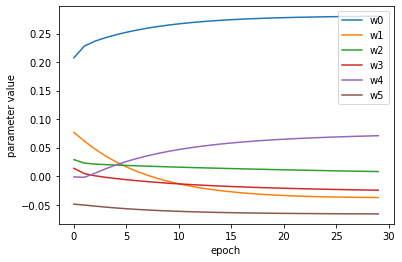

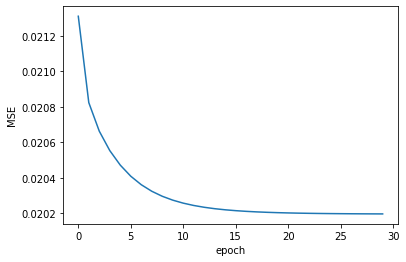

In [ ]:
result = []
for alpha in learning_rate:
    for pen in regularization:
        reg = LinearRegression(learning_rate=alpha, regularization=pen, n_epoch=n_epochs)
        reg.fit(X,y)
        result.append({'learning_rate' : alpha, 'regularization' : pen, 'MSE' : reg.lowest_mse})

best_comb = sorted(result, key=lambda d: d['MSE'])[0:2]


reg = LinearRegression(learning_rate=best_comb[0]['learning_rate'], 
                       regularization=best_comb[0]['regularization'], 
                       n_epoch=n_epochs)

print(best_comb[0],":")
reg.fit(X,y, plot=True)


{'learning_rate': 0.001, 'regularization': 0.01, 'MSE': 0.020209040023166654}


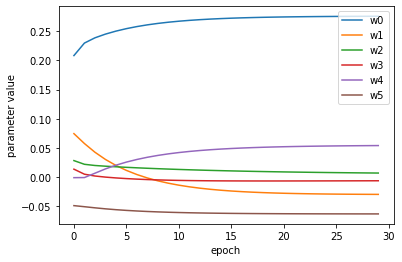

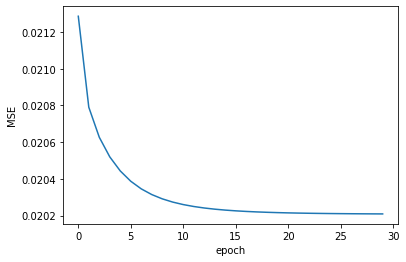

In [ ]:
reg = LinearRegression(learning_rate=best_comb[1]['learning_rate'], 
                       regularization=best_comb[1]['regularization'], 
                       n_epoch=n_epochs)

print(best_comb[1])
reg.fit(X,y, plot=True)

## SGD with RMSprop

{'learning_rate': 0.001, 'regularization': 0, 'MSE': 0.020202367987353042} :


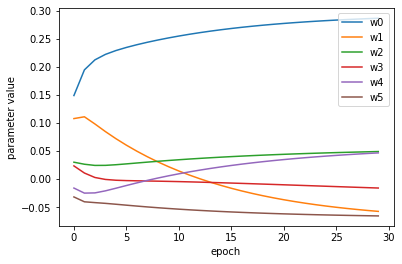

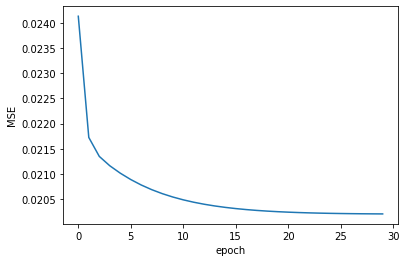

In [ ]:
result = []
for alpha in learning_rate:
    for pen in regularization:
        reg = LinearRegression(learning_rate=alpha, regularization=pen, n_epoch=n_epochs)
        reg.fit(X,y, update_rule='RMSprop')
        result.append({'learning_rate' : alpha, 'regularization' : pen, 'MSE' : reg.lowest_mse})

best_comb = sorted(result, key=lambda d: d['MSE'])[0:2]
print(best_comb[0],":")

reg = LinearRegression(learning_rate=best_comb[0]['learning_rate'], 
                       regularization=best_comb[0]['regularization'], 
                       n_epoch=n_epochs)
reg.fit(X,y, update_rule='RMSprop', plot=True)



{'learning_rate': 0.001, 'regularization': 0.01, 'MSE': 0.02021507484182387} :


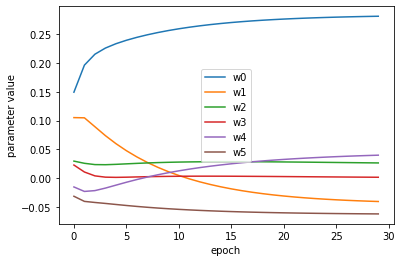

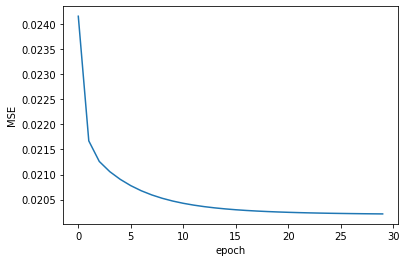

In [ ]:
print(best_comb[1],":")

reg = LinearRegression(learning_rate=best_comb[1]['learning_rate'], 
                       regularization=best_comb[1]['regularization'], 
                       n_epoch=n_epochs)
reg.fit(X,y, update_rule='RMSprop', plot=True)

### Comparing Performances:

It can be seen that the weight updates in rmsprop method is slightly different from that of models trained on momentum-method. We also find that RMSE is lower for SGD with momentum rgan rmsprop method.

There is a sense on localised increment in the w1, when the model is trained using different learning rates for different attributes.

The weight vector w2, symolized by the green curve is slightly different in case of rms and momentum based training.
Possibly when trained individualy using a specific learning rate, weight curve was able to generalize its true nature and attain different minima.

We also find that increase in weight 5 (shown by purple) is more sudden in rmsprop than momentum driven SGD.
The reason could be that while momentum accelerates our search in direction of minima, RMSProp impedes our search in direction of oscillations.

It can also be seen that the error decreases at a faster rate, in initial epochs, when we use same weight vector for all the features. The slow rate of decrement of error in sgd can be attributed to high inconsistency between learning vectors in intial epochs of training

# Question 2: Tensorflow Playground (15 pts)

In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).

Select "**Classification**" as the **Problem Type**. Among the four datasets shown in DATA, please select the **top right** dataset. 

Use the following settings as the DEFAULT settings for all **subquestions**: Learning rate = 0.03, Activation = Tanh, Regularization = None, Ratio of training to test data = 50%, Noise = 0, Batch Size = 30, input as $X_1$ with $X_2$, One hidden layer with two neurons.

a) **(4 pts)** Use the DEFAULT setting and run two experiments - one using **Tanh** as the activation function and one using the **Linear** activation function. Report the train, test losses for both at the end of **1000 epochs**. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this? 

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with **Tanh** as the activation.

b) **(4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT, report the training loss and test loss at the end of 1000 epochs **using 4 neurons and 8 neurons in the hidden layer**. What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this? 

c) **(4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT, change the Activation to **ReLU** and use **4 neurons** in the hidden layer. For learning rate 10, 1, 0.1, 0.01 and 0.001, report the train, test losses at the end of **100 epochs**, **1000 epochs** respectively. What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? 

d) **(3 pts)** Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as $\sin(X_1), X_1^2$ etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc. 

# Answer:

#### a)

The test and training losses after 1000 epochs are 0.180 and 0.200 respectively, while using Tanh as the activation function. For linear activation function, test and training losses are 0.488 and 0.492.

The model is able to capture some trend when using Tanh activation function. However, by using just two neurons in the hidden layer, the model is underfitting and not able to capture the trend completely. In case of a linear activation function, decision boundary will be linear. There is no discernible decision boundary in this case and the losses are also high. Such an activation function adds no non-linearity; hence the whole network would just be equivalent to a single linear neuron. Tanh performs the job better by bringing non-linearity into the picture.

#### b)

The training and test loss is 0.015 and 0.024 respectively with 4 neurons in the hidden layer, . Whereas with 8 neurons in the hidden layer, the training and test loss is 0.010 and 0.021 respectively. We observe a reduction in both the training and test losses upon increasing the neurons from 4 to 8; but in the decision boundary we find that it starts to overfit the training data upon increasing the number of hidden units. This is because the model becomes more complex and variance increases with the increase in hidden units. 

As the number of neurons increase in a hidden layer, more non-linearity can be captured. It is evident from the 8 types of separators that can be visualised on the hidden layer nodes, each one is computed using combination of input features.This process may increase the training time for the entire model. However, if the objective function is too much complicated for learning, increasing hidden layer neurons is a good thing as it may provide us with more number of secondary features to choose from. In order to avoid overfiting of the problem, one can train the model for a fewer number of epochs. 

#### c)

Effect of Learning Rate and Epoch:

For 100 epochs:

i)   For learning rate 10, the train and test loss are 0.584 and 0.765 resp.

ii)  For learning rate 1, the train and test loss are 0.001 and 0.006 resp.

iii) For learning rate 0.1, the train and test loss are 0.007 and 0.016 resp. 

iv)  For learning rate 0.01, the train and test loss are 0.166 and 0.155 resp. 

v)   For learning rate 0.001, the train and test loss are 0.389 and 0.401 resp.

For 1000 epochs:

i)   For learning rate 10, the train and test loss are 0.904 and 1.096 resp. 

ii)  For learning rate 1, the train and test loss rate are 0.000 and 0.002 resp.

iii) For learning rate 0.1, the train and test loss are 0.002 and 0.012 resp.

iv)  For learning rate 0.01, the train and test loss are 0.014 and 0.016 resp.

v)   For learning rate 0.001, the train and test loss are 0.115 and 0.116 resp.

The ideal learning rate seems to be 1. We find that keeping a learning rate as high as 10 results in high training and test loss because the gradient descent function fails to converge to a minimum value. With further decrease of learning rate, the losses increase progressively with the number of epochs fixed which indicates that the gradient function approaches the minimum value very slowly.
With change in number of epochs, we observe that for learning rate of 10, the losses have incresed which indicates that the gradient function failed to converge to a minimum and has instead shooted up with epochs. But for the other learning rates, we observe a decrease in losses indicating that the graident descent fucntion is slowly approaching the minimum value with the increase in epochs.

#### d)

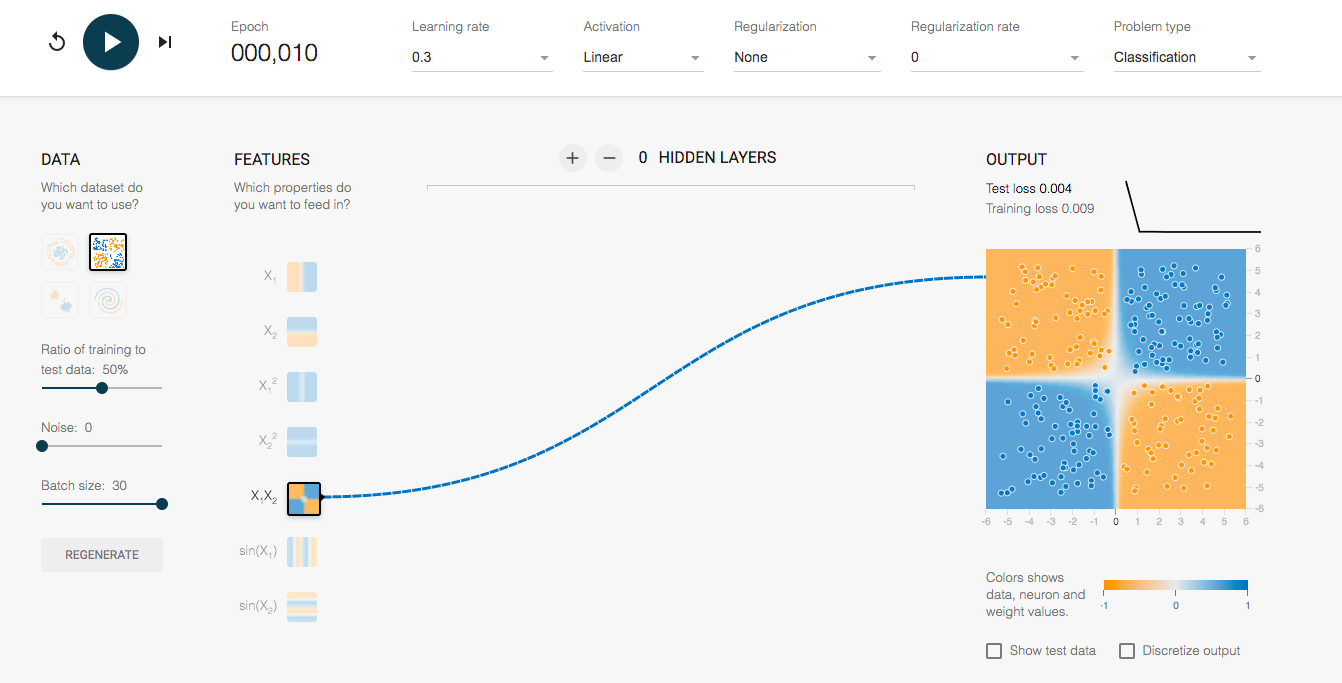

On playing around with hyperparameters, network architectures and input features, we find that a simple model without any hidden layer is able to give test error as less as 0.004 in less than 10 epochs as can be seen in the attached screenshot. A simple model is preferrable over a complex model since it minimizes overfitting, reduces computational costs and trains much faster. Appropriate knowlege about the dataset and its associative behaviour with different features, can help one train a model easily without even employing complicated models. In this case, Input X1 * X2 alone is sufficient to build the model since classification can be done based on the value of X1 * X2. If the product is more than 0, data point will be classified as blue, otherwise, it will be classified as red.
On using more sophisticated input functions like sin(x), we find that the test error increases. Thus, it is not necessary that a more complex model will give better results.

# Question 3: Outlier detection using PyOD (30 pts)

Oulier detection, or anomaly detection is usually an unsupervised learning task where the objective is to identify suspicious observations in data. It has been widely used in military surveillance for enemy activities to prevent attacks, intrusion detection in cyber security, fraud detection for credit cards, etc.

PyOD is a comprehensive and scalable Python library for detecting outlying objects in multivariate data. PyOD includes more than 30 detection algorithms and provides unified APIs which makes it quite handy to use. In this question, you will play with PyOD, explore three different outlier detection algorithms and compare their performances. First let's install PyOD.

```
# install pyod using pip first
!pip install pyod
```

You can load the data stored in 'Q3_train_dataset.csv' and 'Q3_test_dataset.csv' using the following codes.

```
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()
```

 `X_train` and `X_test` contain the features, with the dimension of 5. `y_train` and `y_test` store the outlier labels, 0 means normal data, 1 means outlier data. 
 
a) **(5 pts)** **Fit `X_train` to a linear outlier detection model Minimum Covariance Determinant (MCD) using PyOD**, this [page](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.mcd) will provide some functions you may need. 

```
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# YOUR CODE SHOULD COME HERE, FIT THE MODEL USING X_TRAIN
```
**Use the fitted model to predict the outlier labels of `X_test`. Compute the raw outlier scores on `X_test` using `decision_function()`.**

**Run PyOD's `evaluate_print()` function using the test set ground truth outlier labels and the raw outlier scores predicted by the model, to compute the ROC and Precision@n results .** 

```
from pyod.utils.data import evaluate_print
```

b) **(5 pts)** `X_train` and `X_test` are 5-dimension features, which makes it impossible to visualize them in Euclidean plane. But we can use Principal Component Analysis (PCA) to reduce the dimensions of `X_train` and `X_test` to 2, and then plot them. You may want to use `fit_and_transform()` function.


```
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = # IMPLEMENT
test_principalComponents = # IMPLEMENT
```

After reducing the dimension to 2, now you can visualize the outliers using PyOD's `visualize()` function. Please plot the visualization. You may find [this](https://pyod.readthedocs.io/en/latest/pyod.utils.html#module-pyod.utils.example) useful on how to use `visualize()` .

```
from pyod.utils.example import visualize
```

Now you should be able to observe the ground truth outliers and the outliers predicted by the model.


c) **(20 pts)** Apply the same process as in (a) and (b) to the following two models, and visualize the outlier results. Please compare the performance of the three models in terms of their ROC, Precision@n, and what you observe from the three visualizations.

*   [Proximity-Based model - Clustering Based Local Outlier Factor (CBLOF)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.cblof)
*   [Probabilistic model - Copula-based Outlier Detection (COPOD)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.copod)

```
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD
```

# Answer:

In [ ]:
# install pyod using pip first
# !pip install pyod

In [ ]:
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()

### a)

In [ ]:

from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# fit the model using X_train

# YOUR CODE SHOULD COME HERE
clf.fit(X_train)

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None)

In [ ]:
from pyod.utils.data import evaluate_print
# predict the outlier labels of X_test using the trained model, compute the raw outlier scores on X_test using decision_function()
# then use evaluate_print() to print out the evaluation results

# YOUR CODE SHOULD COME HERE
clf.predict(X_test)
clf.decision_function(X_test)
evaluate_print(clf, y_test, clf.decision_function(X_test))

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None) ROC:0.8689, precision @ rank n:0.6


### b)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


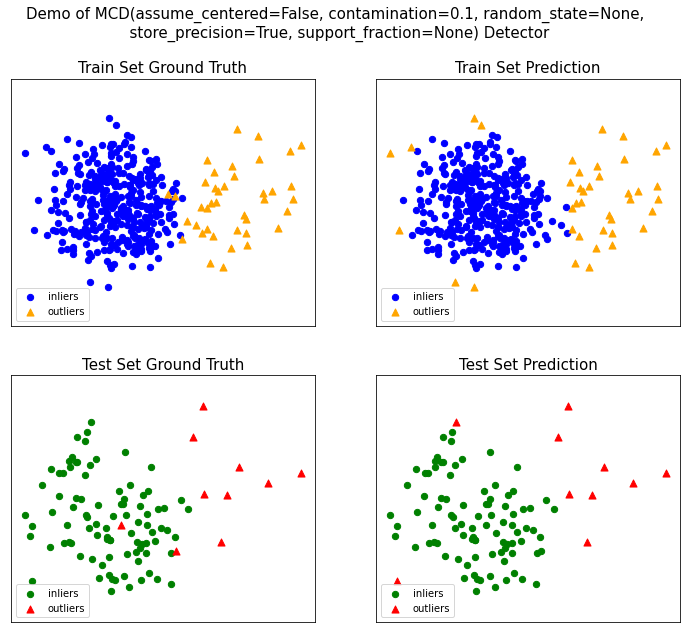

In [ ]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = pca.fit_transform(X_train) # YOUR CODE SHOULD COME HERE
test_principalComponents = pca.fit_transform(X_test) # YOUR CODE SHOULD COME HERE

from pyod.utils.example import visualize
# Visualize the ground truth outliers and predicted outliers using visualize()

# YOUR CODE SHOULD COME HERE
clf = MCD()
clf.fit(train_principalComponents)
visualize(
    clf_name=clf,
    X_train=train_principalComponents, 
    y_train=y_train, 
    X_test=test_principalComponents, 
    y_test=y_test, 
    y_train_pred=clf.predict(train_principalComponents), 
    y_test_pred=clf.predict(test_principalComponents))

### c)

In [ ]:
def print_evaluated_results(clf,chain=False):
  global X_train,X_test,y_train,y_test
  # print(y_train.shape)
  clf.fit(X_train)
  y_pred=clf.predict(X_test)
  y_score=clf.decision_function(X_test)

  
  if not chain:
    evaluate_print(clf,y_test,y_score)
    print('\n\n')
    return 
  return clf
  

def visualize_components(clf):
  global X_train,X_test,y_train,y_test

  pca = PCA(n_components=2)

  train_principalComponents= pca.fit_transform(X_train)
  test_principalComponents = pca.transform(X_test)


  clf=print_evaluated_results(clf,chain=True)
  visualize(clf,X_train=train_principalComponents,y_train=y_train,
            X_test=test_principalComponents,y_test=y_test,
            y_train_pred=clf.predict(X_train),y_test_pred=clf.predict(X_test))


# print_evaluated_results(clf)
# visualize_components(clf)

CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False) ROC:0.8789, precision @ rank n:0.6


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


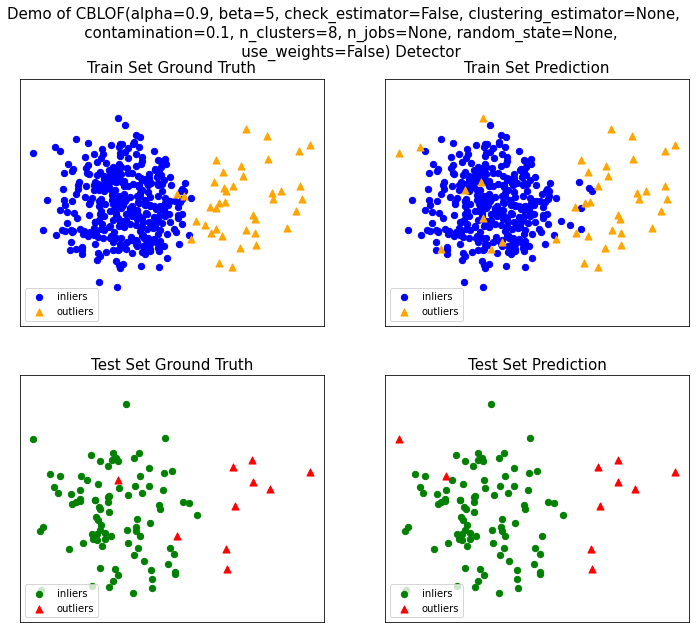

COPOD(contamination=0.1, n_jobs=1) ROC:0.9556, precision @ rank n:0.8


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


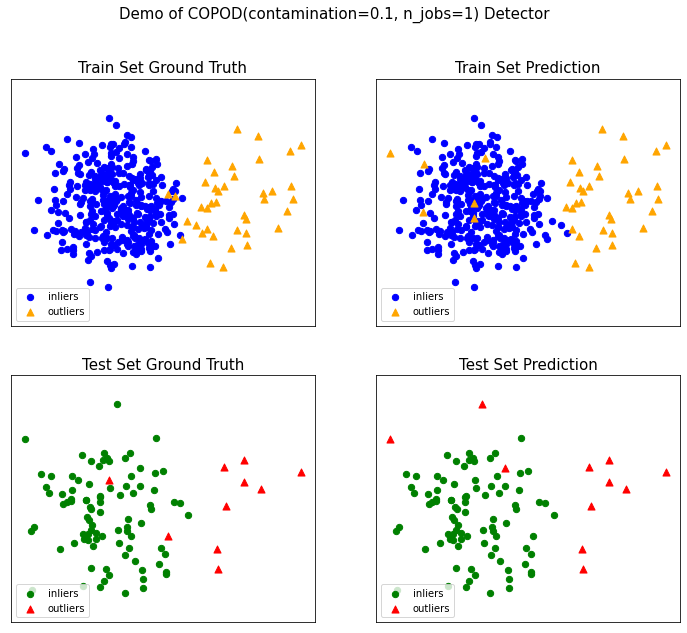

In [ ]:

from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD

# YOUR CODE SHOULD COME HERE
clf = CBLOF()
clf.fit(X_train)
clf.predict(X_test)
clf.decision_function(X_test)
evaluate_print(clf, y_test, clf.decision_function(X_test))
visualize_components(clf)


clf = COPOD()
clf.fit(X_train)
clf.predict(X_test)
clf.decision_function(X_test)
evaluate_print(clf, y_test, clf.decision_function(X_test))
visualize_components(clf)

### Comparison of the Performances:

ROC of the probablistic model is higher (0.95) compared to the ROC of the Proximity based model or covariance dependent model. The precision score of probabilistic model is also higher than that of both proximity based model or covariance dependent model

We can observe presence of predicted false outliers in covariance dependent model which has improved in probability and proximity based models.

There are presence of false positives in test set across every model. This can be attributed to behaviour of data points. Some green test based points are distant from the major corpus, top left, so a variation or any related discriminant function may assign them as outlier. Therefore they are hard to be estimated precisely.

In addition to this, while visualising the PCA graphs we can observe that variance based method was not able to detect the outliers that has similar variation distribution as other normal points. 

Hence, it is apparent that we should use a mix of approach while determining any sets of outliers.

# Question 4: PCA Conceptual questions (5 pts)
Explain the principle of Principal Component Analysis algorithm, especially why we can select the best projection bases based on the covariance matrix of data from the perspective of optimization?

# Answer:


Principal Component Analysis (PCA) is an unsupervised linear transformation technique majorly used for feature extraction and dimensionality reduction. PCA helps us to identify patterns in data based on the correlation between features. PCA aims to find the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one.


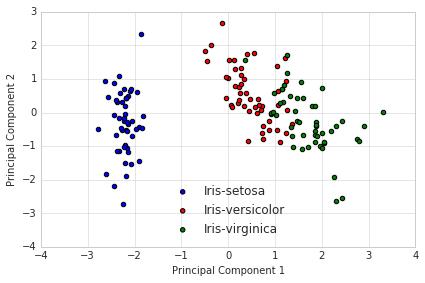

As a part of the PCA we construct a d*d covariance matrix where d is the number of dimensions in the dataset and it stores the pairwise covariances between different features. We obtain the eigenpairs of the covariance matrix. For reducing the dimensionality of our dataset by compressing it onto a new feature subspace, we select the principal components (Eigen Vectors) that contain the most information. The eigenvalues define the define the magnitude of the eigenvectors so we select the top K eigenvectors based on the values of their corresponding eigenvalues, construct a projection matrix from the selected vectors and leverage it to transform the data onto lower dimension subspace. The process of optimization and orthogonal variance computation is iteratively carried out till the entire dataset is explained using computed vectors.

Thus this process is equivalent to computing eigenvalues and eigenvectors of covariance matrix. The sum of eigenvalues of selected eigenvectors helps to determine the amount of varaiation of data explained. Whereas, the eigenvectors act as the respective PCA directions of the dataset.



# Question 5: Pre-processing and sampling (15 pts)

The following dataset contains House prices describing the sales of individual residential property in Ames, Iowa data with explanatory variables describing almost every aspect of residential homes and dependent variable being SalePrice. Here, some cells of most columns in the dataset contain NaN values.














a) **(2 pts)** Print the number of NaN values in each column.


In [ ]:
sales_df = pd.read_csv("sales_data.csv")
display(sales_df.isna().sum())

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Alley            1369
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          8
ExterQual           0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeatur

b) **(3 pts)** Create a copy of `data`, and name it `data_dm`, then create a new column in `data_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use `pandas.cut()` and modify its paramter list as below:

```
bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']
include_lowest=True
```
Next, perform one-hot encoding on this new column.

In [ ]:
data_dm = sales_df.copy()

In [ ]:
data_dm['binned_yr_built'] = pd.cut(data_dm['YearBuilt'], bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020], labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020'], include_lowest=True)

In [ ]:
#Performing one-hot encoding:

dummy_df = pd.get_dummies(data_dm['binned_yr_built'], prefix ="built_")
data_dm = data_dm.merge(dummy_df, left_index=True,right_index=True)
data_dm

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,MoSold,YrSold,SalePrice,binned_yr_built,built__1900-1920,built__1920-1940,built__1940-1960,built__1960-1980,built__1980-2000,built__2000-2020
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,...,2,2008,208500,2000-2020,0,0,0,0,0,1
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,...,5,2007,181500,1960-1980,0,0,0,1,0,0
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,...,9,2008,223500,2000-2020,0,0,0,0,0,1
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,...,2,2006,140000,1900-1920,1,0,0,0,0,0
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,...,12,2008,250000,1980-2000,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,NaN,6,5,1999,2000,0.0,...,8,2007,175000,1980-2000,0,0,0,0,1,0
1456,20,RL,85.0,13175,NaN,6,6,1978,1988,119.0,...,2,2010,210000,1960-1980,0,0,0,1,0,0
1457,70,RL,66.0,9042,NaN,7,9,1941,2006,0.0,...,5,2010,266500,1940-1960,0,0,1,0,0,0
1458,20,RL,68.0,9717,NaN,5,6,1950,1996,0.0,...,4,2010,142125,1940-1960,0,0,1,0,0,0



c) **(2 pts)** Drop the columns which have more than 65 percentage of missing values.

In [ ]:
missing_values= data_dm.isna().sum()/len(data_dm)*100 

In [ ]:
missing_values_constraint = missing_values[missing_values > 65]
missing_values_constraint

Alley          93.767123
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [ ]:
missing_dropped= list(missing_values_constraint.index.values)
missing_dropped

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [ ]:
data_dm.drop(columns = missing_dropped, inplace = True)

In [ ]:
data_dm.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'binned_yr_built', 'built__1900-1920',
       'built__1920-1940', 'built__1940-1960', 'built__1960-1980',
       'built__1980-2000', 'built__2000-2020'],
      dtype='object')


d) **(3 pts)** Take a sample of 800 rows at random and compute its mean, compare this value with the population mean.
  

In [ ]:
np.random.seed(12)
sample_800 = np.random.choice(a= data_dm['SalePrice'], size=800)

#Sample mean
sam_mean=np.mean(sample_800)

#Population mean
pop_mean=data_dm['SalePrice'].mean()

print("Thus, sample mean is:", sam_mean, "while true mean is: ", pop_mean)
print("The sample mean is ", round((pop_mean - sam_mean)/pop_mean*100,2), "% less than population mean")

Thus, sample mean is: 180755.46375 while true mean is:  180921.19589041095
The sample mean is  0.09 % less than population mean


e) **(2pts)** Calculate the 95% confidence intervals for SalePrice with a sample size of 100. 

**(3pts)** Calculate the 95% confidence intervals for 100 different trials with a sample size of 500. Plot the confidence intervals and interpret how it captures the population mean.

<AxesSubplot:ylabel='Frequency'>

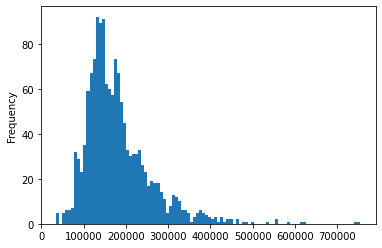

In [ ]:
data_dm['SalePrice'].plot(kind='hist',bins=100)

This seems to be a skewed distribution, hence z score for individual sample cannot be computed. Thus, we will build confidence interval for sample statistics using central limit theorem

In [ ]:
np.random.seed(10)
sample_size = 100
sample_100 = np.random.choice(a= data_dm['SalePrice'],
                          size = sample_size)
sample_mean = sample_100.mean()

#Get the critical Z value
z_critical = 1.96

#Get population standard deviation
pop_stdev = data_dm['SalePrice'].std()

#margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

print('95% confidence intervals for SalePrice is: (', sample_mean - margin_of_error, ',', sample_mean + margin_of_error, ')')

print('True value of Mean: ', data_dm['SalePrice'].mean())


95% confidence intervals for SalePrice is: ( 166521.7994349542 , 197663.26056504578 )
True value of Mean:  180921.19589041095


In [ ]:
confidence_interval = []
sample_mean = []

for r in range(100):
        dm_sample_500 = data_dm.sample(500, random_state= r)
        mean_sample_500 = dm_sample_500['SalePrice'].mean()
        sample_mean.append(mean_sample_500)
        sample_std = population_std/math.sqrt(500)
        confidence_interval.append([mean_sample_500 - 2*sample_std, mean_sample_500 + 2*sample_std])
        
     

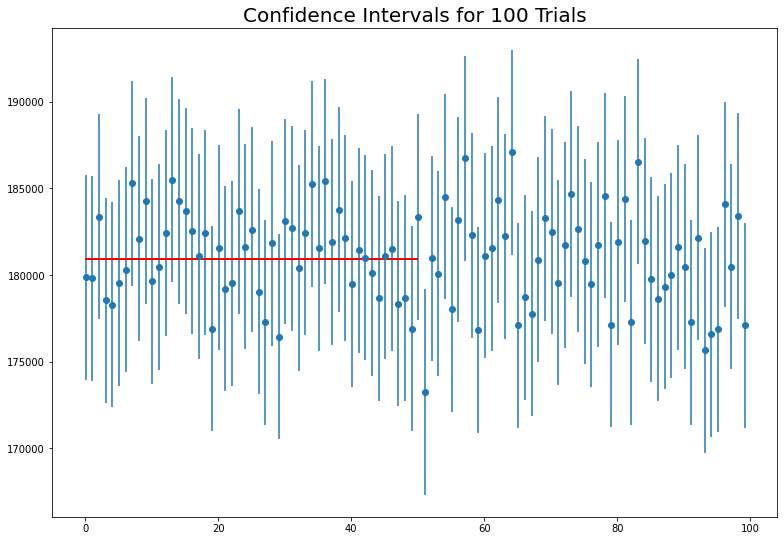

In [ ]:
plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 100, 1), 
             y=sample_mean, 
             yerr=[(top-bot)/2 for top,bot in confidence_interval],
             fmt='o')

plt.hlines(xmin=0, xmax=50,
           y=data_dm['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 100 Trials', fontsize = 20)
plt.show()